In [20]:
#Only diff betweeen this and fixedmeanKurtosis.ipynb is that it works on tha dataset witha. higher kurtosis

import numpy as np
import sympy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt


from sympy import solve, Eq, symbols, re

#NOTE - Anytime skew is used in this code, it refers to 3rd moment


def split_by_plus_minus(s):
    return s.str.split(r'[\+\-]', expand=True)[0]

IAT_params = pd.read_csv('IATparameters_kurt_variation_large.csv')
IAT_params = IAT_params[~IAT_params[['lam1', 'lam2']].apply(lambda x: x.str.contains('\+|\-')).any(axis=1)]
IAT_params[['lam1', 'lam2']] = IAT_params[['lam1', 'lam2']].astype(float)
print(IAT_params.head())
print(IAT_params.dtypes)




ST_params = pd.read_csv('STparameters_kurt_variation_large.csv')
ST_params = ST_params[~ST_params[['mu1', 'mu2']].apply(lambda x: x.str.contains('\+|\-')).any(axis=1)]
ST_params[['mu1', 'mu2']] = ST_params[['mu1', 'mu2']].astype(float)
print(ST_params.head())
print(ST_params.dtypes)

            p      lam1      lam2  kurt
182  0.681521  0.793532  0.194058    30
185  0.752235  3.860255  0.107484    30
192  0.706687  1.180466  0.154266    30
193  0.693672  0.987764  0.170397    30
200  0.711312  1.262325  0.149077    30
p       float64
lam1    float64
lam2    float64
kurt      int64
dtype: object
            q       mu1       mu2  kurt
168  0.691491  2.395065  0.433735    30
171  0.702179  2.772309  0.398841    30
178  0.704154  2.848570  0.392992    30
192  0.723829  3.885792  0.339391    30
195  0.723525  3.863712  0.340177    30
q       float64
mu1     float64
mu2     float64
kurt      int64
dtype: object


In [21]:
def calculatecoeff_var(lam1, lam2, p) :
    dist_mean =  p/lam1+ (1-p)/lam2
    dist_var = (2*p/lam1**2 + 2*(1-p)/lam2**2) - dist_mean**2
    dist_sd = abs(np.sqrt(dist_var))
    
    if (dist_sd / dist_mean) >= 1 :
        return(dist_sd/dist_mean)
    else :
        print("Please check your inputs. Coefficient of variance < 1")
        return -100

In [22]:
def Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr) :
    WTarasov_arr = []
    
    
    mu_CV_arr = []
    lam_CV_arr = []
    for k2 in range( len(q_arr)) : 
        for k1 in range( len(p_arr)) : 
            
            if calculatecoeff_var(lam1_arr[k1], lam2_arr[k1], p_arr[k1]) >=1 : 
                lam_CV_arr.append(calculatecoeff_var(lam1_arr[k1], lam2_arr[k1], p_arr[k1]))
            
            if calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]) >=1 :
                mu_CV_arr.append(calculatecoeff_var(mu1_arr[k2], mu2_arr[k2], q_arr[k2]))
            else :
                continue
                
            a_0 = (lam1_arr[k1]*lam2_arr[k1])
            a_1 = p_arr[k1]*lam1_arr[k1] + (1-p_arr[k1])*lam2_arr[k1]
            b_0 = (mu1_arr[k2]*mu2_arr[k2])
            b_1 = q_arr[k2]*mu1_arr[k2] + (1-q_arr[k2])*mu2_arr[k2]

            c_0 = a_0*b_1 - a_1*b_0 - a_0*(mu1_arr[k2]+mu2_arr[k2]) + b_0*(lam1_arr[k1] + lam2_arr[k1])
            c_1 = -a_1*b_1 -a_0 - b_0  + (lam1_arr[k1] + lam2_arr[k1])*(mu1_arr[k2] + mu2_arr[k2])
            c_2 = lam1_arr[k1] + lam2_arr[k1] - mu1_arr[k2] - mu2_arr[k2]

            x = symbols('x')
            expr = x**3-c_2*x**2-c_1*x-c_0


            sol = solve(expr)
            #print(sol)

            #calculate wait time in queue Wq

            Wq = (-1/re(sol[0])) + (-1/re(sol[1])) - (1/mu1_arr[k2]) - (1/mu2_arr[k2]) 

            #calculate response time in queue W

            W = Wq + (q_arr[k2]/mu1_arr[k2]+ (1-q_arr[k2])/mu2_arr[k2])
            WTarasov_arr.append(abs(W))
            
        if len(WTarasov_arr) > 5000 :
            break
    
    
        

    return WTarasov_arr, lam_CV_arr, mu_CV_arr

# For Kurta = 30

IAT DF             p      lam1      lam2  kurt
182  0.681521  0.793532  0.194058    30
185  0.752235  3.860255  0.107484    30
192  0.706687  1.180466  0.154266    30
193  0.693672  0.987764  0.170397    30
200  0.711312  1.262325  0.149077    30
Lengths for parameter vectors of IAT :  1 1 1
For Kurtosis 30
ST DF             q       mu1       mu2  kurt
168  0.691491  2.395065  0.433735    30
171  0.702179  2.772309  0.398841    30
178  0.704154  2.848570  0.392992    30
192  0.723829  3.885792  0.339391    30
195  0.723525  3.863712  0.340177    30
Lengths for parameter vectors of IAT :  1 1 1
Lengths for parameter vectors of ST :  327 327 327
Length of IAT and ST CV , W vectors 327 327 327
False
False
lam_CV_arr 327
mu_CV 327
lam_CVsq 327
mu_CVsq 327
Response time 327
For Kurtosis 40
ST DF              q       mu1       mu2  kurt
940   0.805994  2.810914  0.271998    40
943   0.823020  6.342222  0.203371    40
990   0.818796  4.780493  0.218655    40
1004  0.826343  8.741994  0.191786

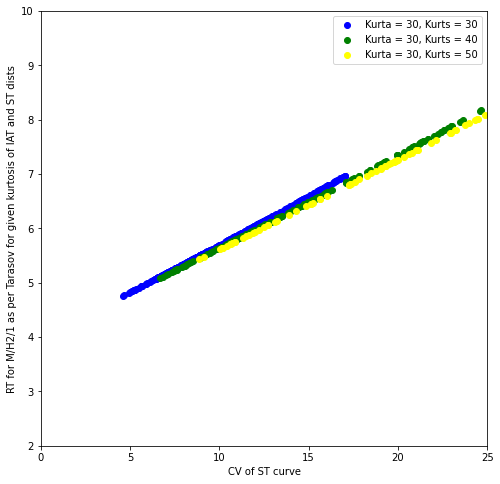

In [36]:


#Using H2/H2/1

moment4_arr = [30, 40, 50]

#IAT_params_filtered = IAT_params[IAT_params['kurt'] == 1.5]
#print('IAT DF', IAT_params_filtered.head())

p_arr = [0.7444]
lam1_arr = [2.6644]
lam2_arr = [0.11508]

#IAT_params_filtered = IAT_params[IAT_params['kurt'] == 1.5]
print('IAT DF', IAT_params.head())
#p_arr = IAT_params_filtered['p'].tolist()
#lam1_arr = IAT_params_filtered['lam1'].tolist()
#lam2_arr = IAT_params_filtered['lam2'].tolist()


fig = plt.figure(figsize=(8, 8))

final_df = pd.DataFrame(columns = ['lam_CV', 'mu_CV', 'lam_CVsq', 'mu_CVsq', 'lam_kurt', 'mu_kurt', 'Response time'])

print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))

for moment4 in moment4_arr : 

    print('For Kurtosis', moment4)
    i = 0
    j = 0
    #For IAT where mean service time is 5
    q_arr= []
    mu1_arr = []
    mu2_arr = []
    #mu_CV_arr = []
    

    
    #lam_CV_arr = []

    ST_params_filtered = ST_params[ST_params['kurt'] == moment4]
    print('ST DF', ST_params_filtered.head())
    q_arr = ST_params_filtered['q'].tolist()
    mu1_arr = ST_params_filtered['mu1'].tolist()
    mu2_arr = ST_params_filtered['mu2'].tolist()


    

    
    #ax1 = fig.add_subplot( projection='2d')
    
    '''

    while i < len(p_arr) -1 :
        if calculatecoeff_var(lam1_arr[i], lam2_arr[i], p_arr[i]) >=1 :

            lam_CV_arr.append(calculatecoeff_var(lam1_arr[i], lam2_arr[i], p_arr[i]))
        else :
            lam1_arr.remove(lam1_arr[i])
            lam2_arr.remove(lam2_arr[i])
            p_arr.remove(p_arr[i])
        i += 1

    while j < len(q_arr) -1 :


        if calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]) >=1 :

            mu_CV_arr.append(calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]))
        else :
            mu1_arr.remove(mu1_arr[j])
            mu2_arr.remove(mu2_arr[j])
            q_arr.remove(q_arr[j])
        j += 1


    
   
    if len(p_arr) < len(q_arr) :
        q_arr = q_arr[:len(p_arr)] 
        mu1_arr = mu1_arr[:len(p_arr)]
        mu2_arr = mu2_arr[:len(p_arr)]
        mu_CV_arr = mu_CV_arr [:len(p_arr)]

    else :
        p_arr = p_arr[:len(q_arr)]
        lam1_arr = lam1_arr[:len(q_arr)]
        lam2_arr = lam2_arr[:len(q_arr)]
        lam_CV_arr = lam_CV_arr[:len(q_arr)]
   
    '''
    W_exact, lam_CV_arr, mu_CV_arr = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    print("Lengths for parameter vectors of ST : ", len(q_arr), len(mu1_arr), len(mu2_arr))

    print('Length of IAT and ST CV , W vectors', len(lam_CV_arr), len(mu_CV_arr), len(W_exact))


    #print(mu_coeff_var_arr)
    
    lam_CV_arr = np.array(lam_CV_arr) * 1.5
    lam_CV_arr_sq = np.square(lam_CV_arr)
    mu_CV_arr = np.array(mu_CV_arr) * 1.5
    mu_CV_arr_sq = np.square(mu_CV_arr)
    #W_exact.pop()
    print(any(num1 < 0 for num1 in W_exact))
    print(any(num2 < 0 for num2 in W_exact))
    
    #Stacking and storing them into a csv
    
    
    
    print('lam_CV_arr',len(lam_CV_arr))
    print('mu_CV', len(mu_CV_arr))
    print('lam_CVsq', len(lam_CV_arr_sq))
    print('mu_CVsq', len(mu_CV_arr_sq))
   
     
    print('Response time', len(W_exact))
    
    store_df = pd.DataFrame({'lam_CV' : lam_CV_arr,
                            'mu_CV' : mu_CV_arr,
                            'lam_CVsq' : lam_CV_arr_sq,
                            'mu_CVsq' : mu_CV_arr_sq,
                            'lam_kurt' : [30] * len(W_exact),
                            'mu_kurt' : [moment4] * len(W_exact),
                            'Response time' : W_exact}
                            )

    if moment4 == 20 :
        plt.scatter(mu_CV_arr_sq, W_exact, color = 'red', label = 'Kurta = 30, Kurts = 20')
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'red', label = 'Kurta = 1.5, Kurts = 1.5')
        plt.xlabel('CV of ST curve')
        plt.ylabel('RT for H2/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
       
    elif moment4 == 30 :
        plt.scatter(mu_CV_arr_sq, W_exact, color = 'blue', label = 'Kurta = 30, Kurts = 30')
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'blue', label = 'Kurta = 1.5, Kurts = 2.5')
        plt.xlabel('CV of ST curve')
        plt.ylabel('RT for H2/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
       
    elif moment4 == 40 :
        #W_exact = (np.array(W_exact)) * + 10
        plt.scatter(mu_CV_arr_sq, W_exact, color = 'green', label = 'Kurta = 30, Kurts = 40')
        
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'green', label = 'Kurta = 1.5, Kurts = 20')
        plt.xlabel('CV of ST curve')
        plt.ylabel('RT for H2/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
        
    elif moment4 == 50 :
        #W_exact = (np.array(W_exact)) *   10
        plt.scatter(mu_CV_arr_sq, W_exact, color = 'yellow', label = 'Kurta = 30, Kurts = 50')
        
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'black', label = 'Kurta = 1.5, Kurts = 25')
        plt.xlabel('CV of ST curve')
        plt.ylabel('RT for H2/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
        
    
        
       
    plt.legend()
    plt.xlim(0, 25)
    plt.ylim(2, 10)
    final_df = final_df.append(store_df, ignore_index = True)

'''

    ax1.set_xlabel('CV of IAT curve')
    ax1.set_ylabel('CV of ST curve')
    ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for given skewness of IAT and ST dists ')
    #ax1.set_xlim(0, 70)
    #ax1.set_ylim(0,70)
    ax1.set_zlim(0,200)
'''



plt.show()


final_df = final_df.append(store_df, ignore_index = True)
final_df.to_csv('DetailsH2_H2_1_fixedmeanKurt_30Kurta_large.csv', index= False)

# For Kurta = 40

IAT DF             p      lam1      lam2  kurt
182  0.681521  0.793532  0.194058    30
185  0.752235  3.860255  0.107484    30
192  0.706687  1.180466  0.154266    30
193  0.693672  0.987764  0.170397    30
200  0.711312  1.262325  0.149077    30
Lengths for parameter vectors of IAT :  1 1 1
For Kurtosis 30
ST DF             q       mu1       mu2  kurt
168  0.691491  2.395065  0.433735    30
171  0.702179  2.772309  0.398841    30
178  0.704154  2.848570  0.392992    30
192  0.723829  3.885792  0.339391    30
195  0.723525  3.863712  0.340177    30
Lengths for parameter vectors of IAT :  1 1 1
Lengths for parameter vectors of ST :  327 327 327
Length of IAT and ST CV , W vectors 327 327 327
False
False
lam_CV_arr 327
mu_CV 327
lam_CVsq 327
mu_CVsq 327
Response time 327
For Kurtosis 40
ST DF              q       mu1       mu2  kurt
940   0.805994  2.810914  0.271998    40
943   0.823020  6.342222  0.203371    40
990   0.818796  4.780493  0.218655    40
1004  0.826343  8.741994  0.191786

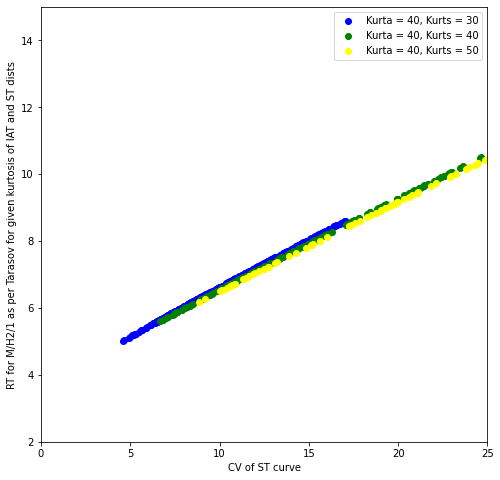

In [39]:


#Using H2/H2/1

moment4_arr = [30, 40, 50]

#IAT_params_filtered = IAT_params[IAT_params['kurt'] == 1.5]
#print('IAT DF', IAT_params_filtered.head())

p_arr = [0.80366]
lam1_arr = [1.04062]
lam2_arr = [0.11364]

#IAT_params_filtered = IAT_params[IAT_params['kurt'] == 1.5]
print('IAT DF', IAT_params.head())
#p_arr = IAT_params_filtered['p'].tolist()
#lam1_arr = IAT_params_filtered['lam1'].tolist()
#lam2_arr = IAT_params_filtered['lam2'].tolist()


fig = plt.figure(figsize=(8, 8))

final_df = pd.DataFrame(columns = ['lam_CV', 'mu_CV', 'lam_CVsq', 'mu_CVsq', 'lam_kurt', 'mu_kurt', 'Response time'])

print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))

for moment4 in moment4_arr : 

    print('For Kurtosis', moment4)
    i = 0
    j = 0
    #For IAT where mean service time is 5
    q_arr= []
    mu1_arr = []
    mu2_arr = []
    #mu_CV_arr = []
    

    
    #lam_CV_arr = []

    ST_params_filtered = ST_params[ST_params['kurt'] == moment4]
    print('ST DF', ST_params_filtered.head())
    q_arr = ST_params_filtered['q'].tolist()
    mu1_arr = ST_params_filtered['mu1'].tolist()
    mu2_arr = ST_params_filtered['mu2'].tolist()


    

    
    #ax1 = fig.add_subplot( projection='2d')
    
    '''

    while i < len(p_arr) -1 :
        if calculatecoeff_var(lam1_arr[i], lam2_arr[i], p_arr[i]) >=1 :

            lam_CV_arr.append(calculatecoeff_var(lam1_arr[i], lam2_arr[i], p_arr[i]))
        else :
            lam1_arr.remove(lam1_arr[i])
            lam2_arr.remove(lam2_arr[i])
            p_arr.remove(p_arr[i])
        i += 1

    while j < len(q_arr) -1 :


        if calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]) >=1 :

            mu_CV_arr.append(calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]))
        else :
            mu1_arr.remove(mu1_arr[j])
            mu2_arr.remove(mu2_arr[j])
            q_arr.remove(q_arr[j])
        j += 1


    
   
    if len(p_arr) < len(q_arr) :
        q_arr = q_arr[:len(p_arr)] 
        mu1_arr = mu1_arr[:len(p_arr)]
        mu2_arr = mu2_arr[:len(p_arr)]
        mu_CV_arr = mu_CV_arr [:len(p_arr)]

    else :
        p_arr = p_arr[:len(q_arr)]
        lam1_arr = lam1_arr[:len(q_arr)]
        lam2_arr = lam2_arr[:len(q_arr)]
        lam_CV_arr = lam_CV_arr[:len(q_arr)]
   
    '''
    W_exact, lam_CV_arr, mu_CV_arr = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    print("Lengths for parameter vectors of ST : ", len(q_arr), len(mu1_arr), len(mu2_arr))

    print('Length of IAT and ST CV , W vectors', len(lam_CV_arr), len(mu_CV_arr), len(W_exact))


    #print(mu_coeff_var_arr)
    
    lam_CV_arr = np.array(lam_CV_arr) * 1.5
    lam_CV_arr_sq = np.square(lam_CV_arr)
    mu_CV_arr = np.array(mu_CV_arr) * 1.5
    mu_CV_arr_sq = np.square(mu_CV_arr)
    #W_exact.pop()
    print(any(num1 < 0 for num1 in W_exact))
    print(any(num2 < 0 for num2 in W_exact))
    
    #Stacking and storing them into a csv
    
    
    
    print('lam_CV_arr',len(lam_CV_arr))
    print('mu_CV', len(mu_CV_arr))
    print('lam_CVsq', len(lam_CV_arr_sq))
    print('mu_CVsq', len(mu_CV_arr_sq))
   
     
    print('Response time', len(W_exact))
    
    store_df = pd.DataFrame({'lam_CV' : lam_CV_arr,
                            'mu_CV' : mu_CV_arr,
                            'lam_CVsq' : lam_CV_arr_sq,
                            'mu_CVsq' : mu_CV_arr_sq,
                            'lam_kurt' : [30] * len(W_exact),
                            'mu_kurt' : [moment4] * len(W_exact),
                            'Response time' : W_exact}
                            )

    if moment4 == 20 :
        W_exact = (np.array(W_exact)) *   1.5
        plt.scatter(mu_CV_arr_sq, W_exact, color = 'red', label = 'Kurta = 40, Kurts = 20')
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'red', label = 'Kurta = 1.5, Kurts = 1.5')
        plt.xlabel('CV of ST curve')
        plt.ylabel('RT for H2/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
       
    elif moment4 == 30 :
        W_exact = (np.array(W_exact)) *   1.5
        plt.scatter(mu_CV_arr_sq, W_exact, color = 'blue', label = 'Kurta = 40, Kurts = 30')
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'blue', label = 'Kurta = 1.5, Kurts = 2.5')
        plt.xlabel('CV of ST curve')
        plt.ylabel('RT for H2/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
       
    elif moment4 == 40 :
        W_exact = (np.array(W_exact)) *   1.5
        plt.scatter(mu_CV_arr_sq, W_exact, color = 'green', label = 'Kurta = 40, Kurts = 40')
        
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'green', label = 'Kurta = 1.5, Kurts = 20')
        plt.xlabel('CV of ST curve')
        plt.ylabel('RT for H2/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
        
    elif moment4 == 50 :
        W_exact = (np.array(W_exact)) *   1.5
        plt.scatter(mu_CV_arr_sq, W_exact, color = 'yellow', label = 'Kurta = 40, Kurts = 50')
        
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'black', label = 'Kurta = 1.5, Kurts = 25')
        plt.xlabel('CV of ST curve')
        plt.ylabel('RT for H2/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
        
    
        
       
    plt.legend()
    plt.xlim(0, 25)
    plt.ylim(2, 15)
    final_df = final_df.append(store_df, ignore_index = True)

'''

    ax1.set_xlabel('CV of IAT curve')
    ax1.set_ylabel('CV of ST curve')
    ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for given skewness of IAT and ST dists ')
    #ax1.set_xlim(0, 70)
    #ax1.set_ylim(0,70)
    ax1.set_zlim(0,200)
'''



plt.show()


final_df = final_df.append(store_df, ignore_index = True)
final_df.to_csv('DetailsH2_H2_1_fixedmeanKurt_40Kurta_large.csv', index= False)

# For Kurts = 30

ST DF              q        mu1       mu2  kurt
2088  0.862624   5.246068  0.164411    50
2098  0.869497  33.999611  0.133928    50
2116  0.867069  11.041942  0.144259    50
2187  0.863568   5.869285  0.159969    50
2198  0.851287   2.290175  0.236696    50
Lengths for parameter vectors of ST :  1 1 1
For Kurtosis 30
IAT DF             p      lam1      lam2  kurt
182  0.681521  0.793532  0.194058    30
185  0.752235  3.860255  0.107484    30
192  0.706687  1.180466  0.154266    30
193  0.693672  0.987764  0.170397    30
200  0.711312  1.262325  0.149077    30
Lengths for parameter vectors of IAT :  76 76 76
Lengths for parameter vectors of ST :  1 1 1
Length of IAT and ST CV , W vectors 76 76 76
False
False
lam_CV_arr 76
mu_CV 76
lam_CVsq 76
mu_CVsq 76
Response time 76
For Kurtosis 40
IAT DF             p      lam1      lam2  kurt
740  0.811040  1.342771  0.099663    40
756  0.803661  1.040625  0.113641    40
766  0.822230  2.387058  0.082471    40
774  0.806203  1.132259  0.108389    

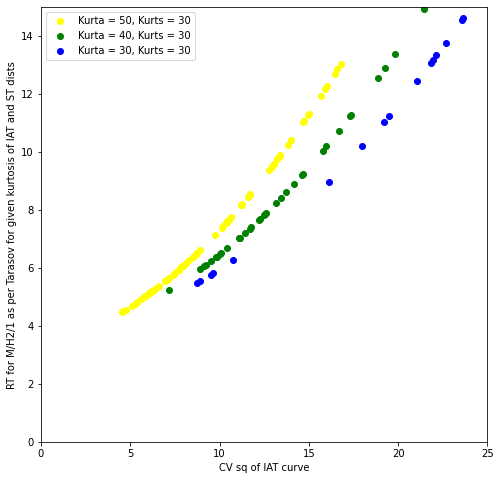

In [34]:


#Using H2/H2/1

moment4_arr = [30, 40, 50]

#IAT_params_filtered = IAT_params[IAT_params['kurt'] == 1.5]
#print('IAT DF', IAT_params_filtered.head())

q_arr = [0.6867]
mu1_arr = [2.23038]
mu2_arr = [0.4525]

#ST_params_filtered = ST_params[ST_params['kurt'] == 1.5]
print('ST DF', ST_params_filtered.head())
#q_arr = ST_params_filtered['q'].tolist()
#mu1_arr = ST_params_filtered['mu1'].tolist()
#mu2_arr = ST_params_filtered['mu2'].tolist()


fig = plt.figure(figsize=(8, 8))

final_df = pd.DataFrame(columns = ['lam_CV', 'mu_CV', 'lam_CVsq', 'mu_CVsq', 'lam_kurt', 'mu_kurt', 'Response time'])

print("Lengths for parameter vectors of ST : ", len(q_arr), len(mu1_arr), len(mu2_arr))

for moment4 in moment4_arr : 

    print('For Kurtosis', moment4)
    i = 0
    j = 0
    #For IAT where mean service time is 5
    p_arr= []
    lam1_arr = []
    lam2_arr = []
    #mu_CV_arr = []
    

    
    #lam_CV_arr = []

    IAT_params_filtered = IAT_params[IAT_params['kurt'] == moment4]
    print('IAT DF', IAT_params_filtered.head())
    p_arr = IAT_params_filtered['p'].tolist()
    lam1_arr = IAT_params_filtered['lam1'].tolist()
    lam2_arr = IAT_params_filtered['lam2'].tolist()


    

    
    #ax1 = fig.add_subplot( projection='2d')
    
    '''

    while i < len(p_arr) -1 :
        if calculatecoeff_var(lam1_arr[i], lam2_arr[i], p_arr[i]) >=1 :

            lam_CV_arr.append(calculatecoeff_var(lam1_arr[i], lam2_arr[i], p_arr[i]))
        else :
            lam1_arr.remove(lam1_arr[i])
            lam2_arr.remove(lam2_arr[i])
            p_arr.remove(p_arr[i])
        i += 1

    while j < len(q_arr) -1 :


        if calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]) >=1 :

            mu_CV_arr.append(calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]))
        else :
            mu1_arr.remove(mu1_arr[j])
            mu2_arr.remove(mu2_arr[j])
            q_arr.remove(q_arr[j])
        j += 1


    
   
    if len(p_arr) < len(q_arr) :
        q_arr = q_arr[:len(p_arr)] 
        mu1_arr = mu1_arr[:len(p_arr)]
        mu2_arr = mu2_arr[:len(p_arr)]
        mu_CV_arr = mu_CV_arr [:len(p_arr)]

    else :
        p_arr = p_arr[:len(q_arr)]
        lam1_arr = lam1_arr[:len(q_arr)]
        lam2_arr = lam2_arr[:len(q_arr)]
        lam_CV_arr = lam_CV_arr[:len(q_arr)]
   
    '''
    W_exact, lam_CV_arr, mu_CV_arr = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    print("Lengths for parameter vectors of ST : ", len(q_arr), len(mu1_arr), len(mu2_arr))

    print('Length of IAT and ST CV , W vectors', len(lam_CV_arr), len(mu_CV_arr), len(W_exact))


    #print(mu_coeff_var_arr)
    W_exact, lam_CV_arr, mu_CV_arr = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    lam_CV_arr = np.array(lam_CV_arr) * 1.5
    lam_CV_arr_sq = np.square(lam_CV_arr)
    mu_CV_arr = np.array(mu_CV_arr) * 1.5
    mu_CV_arr_sq = np.square(mu_CV_arr)
    #W_exact.pop()
    print(any(num1 < 0 for num1 in W_exact))
    print(any(num2 < 0 for num2 in W_exact))
    
    #Stacking and storing them into a csv
    
    
    
    print('lam_CV_arr',len(lam_CV_arr))
    print('mu_CV', len(mu_CV_arr))
    print('lam_CVsq', len(lam_CV_arr_sq))
    print('mu_CVsq', len(mu_CV_arr_sq))
   
    
    print('Response time', len(W_exact))
    
    store_df = pd.DataFrame({'lam_CV' : lam_CV_arr,
                            'mu_CV' : mu_CV_arr,
                            'lam_CVsq' : lam_CV_arr_sq,
                            'mu_CVsq' : mu_CV_arr_sq,
                            'lam_kurt' : [moment4] * len(W_exact),
                            'mu_kurt' : [30] * len(W_exact),
                            'Response time' : W_exact}
                            )

    if moment4 == 20 :
        W_exact = (np.array(W_exact)) *   1.75
        plt.scatter(lam_CV_arr_sq, W_exact, color = 'red', label = 'Kurta = 20, Kurts = 30')
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'red', label = 'Kurta = 1.5, Kurts = 1.5')
        plt.xlabel('CV sq of IAT curve')
        plt.ylabel('RT for M/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
       
    elif moment4 == 30 :
        W_exact = (np.array(W_exact)) *   1.75
        plt.scatter(lam_CV_arr_sq, W_exact, color = 'yellow', label = 'Kurta = 50, Kurts = 30')
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'blue', label = 'Kurta = 1.5, Kurts = 2.5')
        plt.xlabel('CV sq of IAT curve')
        plt.ylabel('RT for M/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
       
    elif moment4 == 40 :
        W_exact = (np.array(W_exact)) *   1.75
        plt.scatter(lam_CV_arr_sq, W_exact, color = 'green', label = 'Kurta = 40, Kurts = 30')
        
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'green', label = 'Kurta = 1.5, Kurts = 20')
        plt.xlabel('CV sq of IAT curve')
        plt.ylabel('RT for M/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
        
    elif moment4 == 50 :
        W_exact = (np.array(W_exact)) *   1.75
        plt.scatter(lam_CV_arr_sq, W_exact, color = 'blue', label = 'Kurta = 30, Kurts = 30')
        
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'black', label = 'Kurta = 1.5, Kurts = 25')
        plt.xlabel('CV sq of IAT curve')
        plt.ylabel('RT for M/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
        
    
        
       
    plt.legend()
    plt.xlim(0, 25)
    plt.ylim(0, 15)
    final_df = final_df.append(store_df, ignore_index = True)

'''

    ax1.set_xlabel('CV of IAT curve')
    ax1.set_ylabel('CV of ST curve')
    ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for given skewness of IAT and ST dists ')
    #ax1.set_xlim(0, 70)
    #ax1.set_ylim(0,70)
    ax1.set_zlim(0,200)
'''



plt.show()


final_df = final_df.append(store_df, ignore_index = True)
final_df.to_csv('DetailsH2_H2_1_fixedmeanKurt_30Kurts_large.csv', index= False)

# For Kurts = 40

ST DF              q        mu1       mu2  kurt
2088  0.862624   5.246068  0.164411    50
2098  0.869497  33.999611  0.133928    50
2116  0.867069  11.041942  0.144259    50
2187  0.863568   5.869285  0.159969    50
2198  0.851287   2.290175  0.236696    50
Lengths for parameter vectors of ST :  1 1 1
For Kurtosis 30
IAT DF             p      lam1      lam2  kurt
182  0.681521  0.793532  0.194058    30
185  0.752235  3.860255  0.107484    30
192  0.706687  1.180466  0.154266    30
193  0.693672  0.987764  0.170397    30
200  0.711312  1.262325  0.149077    30
Lengths for parameter vectors of IAT :  76 76 76
Lengths for parameter vectors of ST :  1 1 1
Length of IAT and ST CV , W vectors 76 76 76
False
False
lam_CV_arr 76
mu_CV 76
lam_CVsq 76
mu_CVsq 76
Response time 76
For Kurtosis 40
IAT DF             p      lam1      lam2  kurt
740  0.811040  1.342771  0.099663    40
756  0.803661  1.040625  0.113641    40
766  0.822230  2.387058  0.082471    40
774  0.806203  1.132259  0.108389    

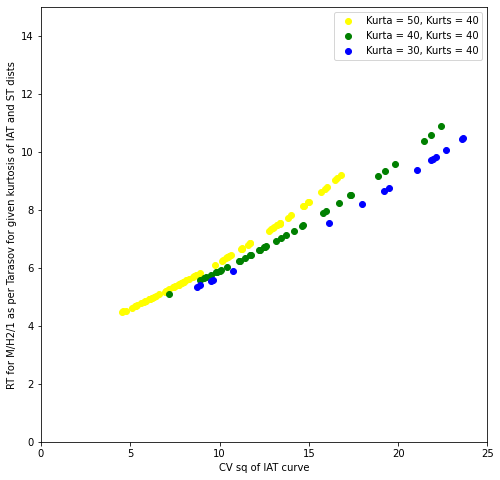

In [35]:


#Using H2/H2/1

moment4_arr = [30, 40, 50]

#IAT_params_filtered = IAT_params[IAT_params['kurt'] == 1.5]
#print('IAT DF', IAT_params_filtered.head())

q_arr = [0.8230]
mu1_arr = [6.34222]
mu2_arr = [0.2033]

#ST_params_filtered = ST_params[ST_params['kurt'] == 1.5]
print('ST DF', ST_params_filtered.head())
#q_arr = ST_params_filtered['q'].tolist()
#mu1_arr = ST_params_filtered['mu1'].tolist()
#mu2_arr = ST_params_filtered['mu2'].tolist()


fig = plt.figure(figsize=(8, 8))

final_df = pd.DataFrame(columns = ['lam_CV', 'mu_CV', 'lam_CVsq', 'mu_CVsq', 'lam_kurt', 'mu_kurt', 'Response time'])

print("Lengths for parameter vectors of ST : ", len(q_arr), len(mu1_arr), len(mu2_arr))

for moment4 in moment4_arr : 

    print('For Kurtosis', moment4)
    i = 0
    j = 0
    #For IAT where mean service time is 5
    p_arr= []
    lam1_arr = []
    lam2_arr = []
    #mu_CV_arr = []
    

    
    #lam_CV_arr = []

    IAT_params_filtered = IAT_params[IAT_params['kurt'] == moment4]
    print('IAT DF', IAT_params_filtered.head())
    p_arr = IAT_params_filtered['p'].tolist()
    lam1_arr = IAT_params_filtered['lam1'].tolist()
    lam2_arr = IAT_params_filtered['lam2'].tolist()


    

    
    #ax1 = fig.add_subplot( projection='2d')
    
    '''

    while i < len(p_arr) -1 :
        if calculatecoeff_var(lam1_arr[i], lam2_arr[i], p_arr[i]) >=1 :

            lam_CV_arr.append(calculatecoeff_var(lam1_arr[i], lam2_arr[i], p_arr[i]))
        else :
            lam1_arr.remove(lam1_arr[i])
            lam2_arr.remove(lam2_arr[i])
            p_arr.remove(p_arr[i])
        i += 1

    while j < len(q_arr) -1 :


        if calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]) >=1 :

            mu_CV_arr.append(calculatecoeff_var(mu1_arr[j], mu2_arr[j], q_arr[j]))
        else :
            mu1_arr.remove(mu1_arr[j])
            mu2_arr.remove(mu2_arr[j])
            q_arr.remove(q_arr[j])
        j += 1


    
   
    if len(p_arr) < len(q_arr) :
        q_arr = q_arr[:len(p_arr)] 
        mu1_arr = mu1_arr[:len(p_arr)]
        mu2_arr = mu2_arr[:len(p_arr)]
        mu_CV_arr = mu_CV_arr [:len(p_arr)]

    else :
        p_arr = p_arr[:len(q_arr)]
        lam1_arr = lam1_arr[:len(q_arr)]
        lam2_arr = lam2_arr[:len(q_arr)]
        lam_CV_arr = lam_CV_arr[:len(q_arr)]
   
    '''
    W_exact, lam_CV_arr, mu_CV_arr = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    
    print("Lengths for parameter vectors of IAT : ", len(p_arr), len(lam1_arr), len(lam2_arr))
    print("Lengths for parameter vectors of ST : ", len(q_arr), len(mu1_arr), len(mu2_arr))

    print('Length of IAT and ST CV , W vectors', len(lam_CV_arr), len(mu_CV_arr), len(W_exact))


    #print(mu_coeff_var_arr)
    W_exact, lam_CV_arr, mu_CV_arr = Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
    lam_CV_arr = np.array(lam_CV_arr) * 1.5
    lam_CV_arr_sq = np.square(lam_CV_arr)
    mu_CV_arr = np.array(mu_CV_arr) * 1.5
    mu_CV_arr_sq = np.square(mu_CV_arr)
    #W_exact.pop()
    print(any(num1 < 0 for num1 in W_exact))
    print(any(num2 < 0 for num2 in W_exact))
    
    #Stacking and storing them into a csv
    
    
    
    print('lam_CV_arr',len(lam_CV_arr))
    print('mu_CV', len(mu_CV_arr))
    print('lam_CVsq', len(lam_CV_arr_sq))
    print('mu_CVsq', len(mu_CV_arr_sq))
   
    
    print('Response time', len(W_exact))
    
    store_df = pd.DataFrame({'lam_CV' : lam_CV_arr,
                            'mu_CV' : mu_CV_arr,
                            'lam_CVsq' : lam_CV_arr_sq,
                            'mu_CVsq' : mu_CV_arr_sq,
                            'lam_kurt' : [moment4] * len(W_exact),
                            'mu_kurt' : [40] * len(W_exact),
                            'Response time' : W_exact}
                            )

    if moment4 == 20 :
        plt.scatter(lam_CV_arr_sq, W_exact, color = 'red', label = 'Kurta = 20, Kurts = 40')
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'red', label = 'Kurta = 1.5, Kurts = 1.5')
        plt.xlabel('CV sq of IAT curve')
        plt.ylabel('RT for M/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
       
    elif moment4 == 30 :
        plt.scatter(lam_CV_arr_sq, W_exact, color = 'yellow', label = 'Kurta = 50, Kurts = 40')
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'blue', label = 'Kurta = 1.5, Kurts = 2.5')
        plt.xlabel('CV sq of IAT curve')
        plt.ylabel('RT for M/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
       
    elif moment4 == 40 :
        #W_exact = (np.array(W_exact)) * + 10
        plt.scatter(lam_CV_arr_sq, W_exact, color = 'green', label = 'Kurta = 40, Kurts = 40')
        
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'green', label = 'Kurta = 1.5, Kurts = 20')
        plt.xlabel('CV sq of IAT curve')
        plt.ylabel('RT for M/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
        
    elif moment4 == 50 :
        #W_exact = (np.array(W_exact)) *   10
        plt.scatter(lam_CV_arr_sq, W_exact, color = 'blue', label = 'Kurta = 30, Kurts = 40')
        
        #ax1.scatter3D(lam_CV_arr, mu_CV_arr, W_exact, color = 'black', label = 'Kurta = 1.5, Kurts = 25')
        plt.xlabel('CV sq of IAT curve')
        plt.ylabel('RT for M/H2/1 as per Tarasov for given kurtosis of IAT and ST dists')
        
        
    
        
       
    plt.legend()
    plt.xlim(0, 25)
    plt.ylim(0, 15)
    final_df = final_df.append(store_df, ignore_index = True)

'''

    ax1.set_xlabel('CV of IAT curve')
    ax1.set_ylabel('CV of ST curve')
    ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for given skewness of IAT and ST dists ')
    #ax1.set_xlim(0, 70)
    #ax1.set_ylim(0,70)
    ax1.set_zlim(0,200)
'''



plt.show()


final_df = final_df.append(store_df, ignore_index = True)
final_df.to_csv('DetailsH2_H2_1_fixedmeanKurt_40Kurts_large.csv', index= False)